<a href="https://colab.research.google.com/github/mohananup/sentimental_analysis/blob/main/sentimental_analysis_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [34]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [35]:
X_train = vectorize(X_train)
X_test = vectorize(X_test)

In [36]:
y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")

In [37]:
model = Sequential()
model.add(Dense(16, input_dim=10000, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=10, batch_size=550, validation_data=(X_test, y_test))

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.7167 - loss: 0.5740 - val_accuracy: 0.8811 - val_loss: 0.2945
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9261 - loss: 0.2046 - val_accuracy: 0.8807 - val_loss: 0.3031
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9558 - loss: 0.1346 - val_accuracy: 0.8726 - val_loss: 0.3497
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9600 - loss: 0.1128 - val_accuracy: 0.8704 - val_loss: 0.3958
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9755 - loss: 0.0806 - val_accuracy: 0.8640 - val_loss: 0.4604
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9818 - loss: 0.0640 - val_accuracy: 0.8591 - val_loss: 0.5270
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9875 - loss: 0.0509 - val_accuracy: 0.8554 - val_loss: 0.6096
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9912 - loss: 0.0383 - val_accuracy: 0.8520 - 

In [39]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [40]:
acc = accuracy_score(y_test, y_pred)
print("The accuracy score is:", 100*acc, "%")
cmat = confusion_matrix(y_test, y_pred)
print(cmat)

The accuracy score is: 84.70400000000001 %
[[10392  2108]
 [ 1716 10784]]


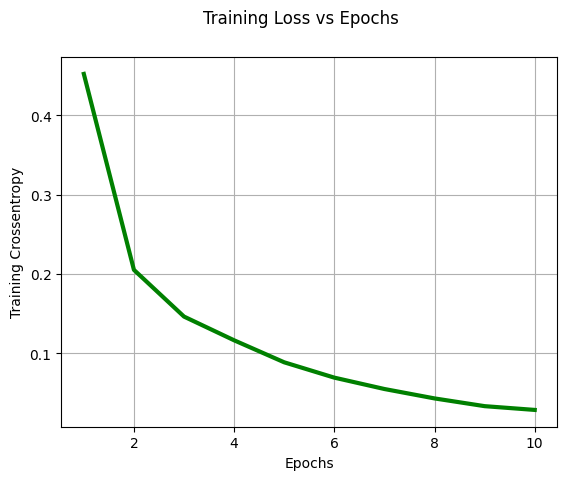

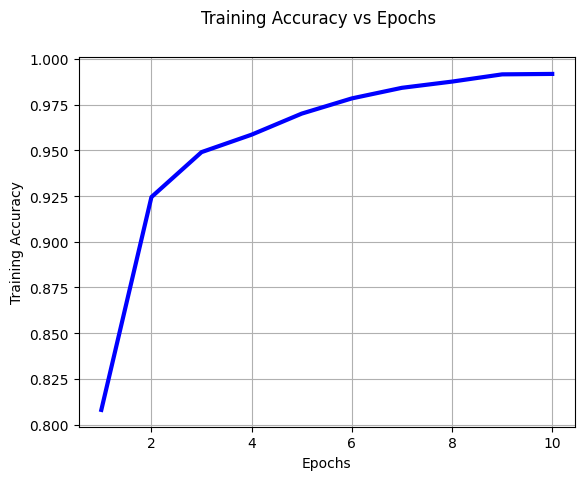

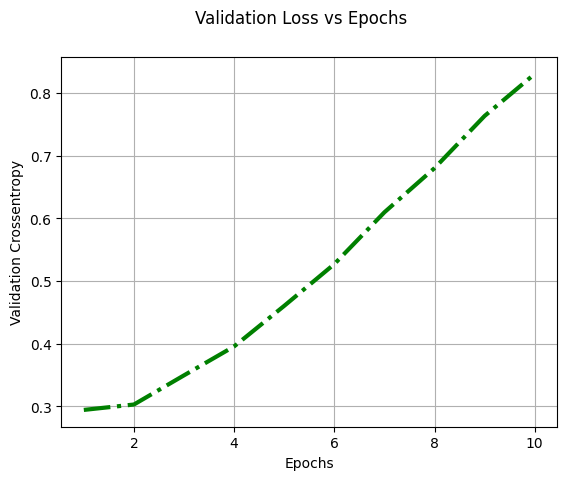

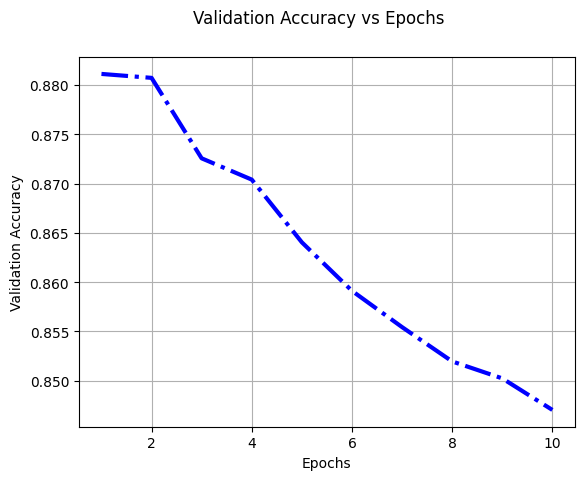

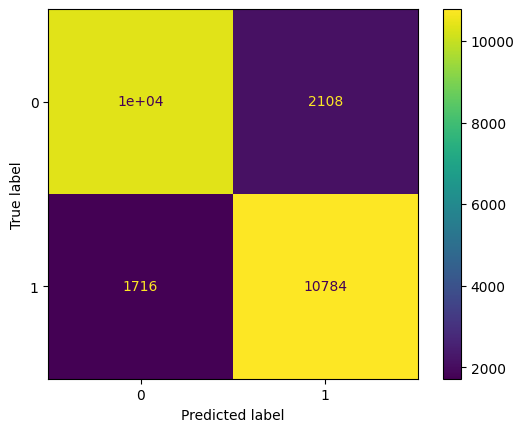

In [41]:
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()